# Celdas

Las jupyter tienen "celdas". Pueden ser codigo o texto. Esto es una celda de texto, podemos usar lenguaje markdown. Ejemplo:

1. listas numeradas

Ecuaciones formato latex: $V_{esfera} = \frac{4}{3} \pi  r^3$

**negrita**, *cursiva*, o `formato codigo`

emojis ⚔ 

In [ ]:
print('hola')

# Tipos de Datos

In [48]:
n = 10
x = 0.1
s = 'hola'
l = [1,2,3]
condicion = False

print(type(n), type(x), type(s), type(l), type(condicion))

<class 'int'> <class 'float'> <class 'str'> <class 'list'> <class 'bool'>


# comados basicos

In [49]:
#condicionales
condicion = False
if condicion:
    print('la condicion es verdadera')
else:
    print('la condicion es falsa')

la condicion es falsa


In [52]:
# podemos iterar sobre la lista con un "for"
milista = [1,2,3,'hola']
for elemento in milista:
    print(elemento)
print()

# o bien con el indice
for i in range(len(milista)):
    elemento = milista[i]
    print(i, '-', elemento)

1
2
3
hola

0 - 1
1 - 2
2 - 3
3 - hola


In [54]:
# funciones
# notar que, como en excel, la logica es: input -> funcion -> output

def duplicar(x):
    resultado = 2 * x
    return resultado

print(duplicar(5))
print()

def coincidir(valor, lista, ordenado=False):
    for i in range(len(lista)):
        elemento = lista[i]
        if ordenado:
            if elemento > valor:
                return i
        else:
            if elemento == valor:
                return i
    return "N/A"

nombres = ['jorge', 'marcos',  'pablo', 'pedro', 'raul']
print(coincidir('marcos', nombres))
print(coincidir('maria', nombres))
print(coincidir('maria', nombres, True))



10

1
N/A
2


# Pandas

In [9]:
import pandas as pd

datos = pd.DataFrame({
    'nombre': ['pepe', 'maria', 'jorge'],
    'edad': [10, 12, 8],
    'sexo': ['M', 'F', 'M'],
    'color_preferido': ['rojo', 'azul', 'azul'],
    'altura': [1.2, 1.3, 1.1],
})

print(datos)
print()

  nombre  edad sexo color_preferido  altura
0   pepe    10    M            rojo     1.2
1  maria    12    F            azul     1.3
2  jorge     8    M            azul     1.1



In [12]:
print('en total hay', len(datos), 'chicos')
print(datos.shape)
print()

print(datos.dtypes)
print()


en total hay 3 chicos
(3, 5)

nombre              object
edad                 int64
sexo                object
color_preferido     object
altura             float64
dtype: object



# Graficos

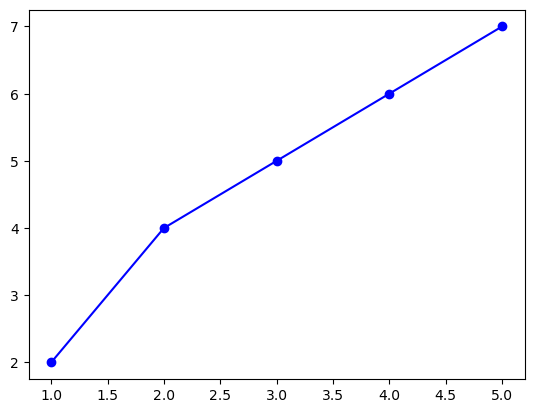

In [4]:
# la libreria basica de python
import matplotlib.pyplot as plt
x = [1,2,3,4,5]
y = [2,4,5,6,7]

plt.plot(x, y, marker='o', color='blue')

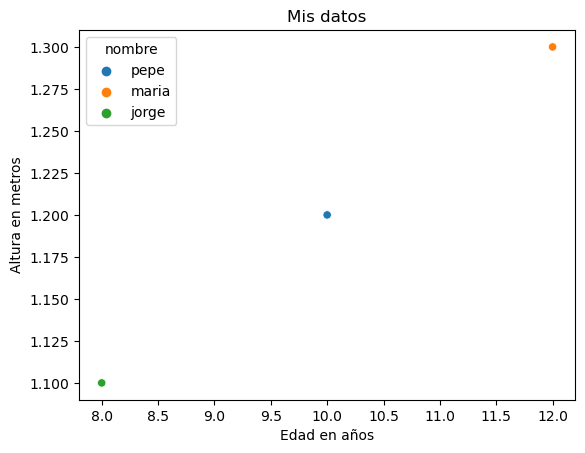

In [15]:
# ejemplo de una libreria un poco mejor
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with 'total_bill' on x-axis and 'tip' on y-axis
sns.scatterplot(datos, x='edad', y='altura', hue='nombre')

# Set the title and axis labels
plt.title("Mis datos")
plt.xlabel("Edad en años")
plt.ylabel("Altura en metros")

# Show the plot
plt.show()

In [26]:
# ejemplo de una libreria interactiva
import plotly.express as px
fig = px.scatter(datos, x='edad', y='altura')
fig.update_layout(xaxis_title="edad", yaxis_title="altura", height=300, width=500)
fig.show()

# ejemplo 

## leer datos

In [46]:
df = pd.read_excel('datos/Base Demanda Diaria 2017 2023.xlsx', sheet_name='Datos Región', skiprows=4)
df.head()


,AÑO,MES,Fecha,Tipo día,GRAN BS.AS.,BUENOS AIRES,CENTRO,LITORAL,CUYO,NOROESTE,NORESTE,COMAHUE,PATAGONICA,DEMANDA TOTAL,TEMPERATURA REFERENCIA MEDIA GBA °C
0,2017,2017-01-01,2017-01-01,Domingo o Feriado,6352.695208,1472.270500,1134.394250,1766.623958,903.135875,1602.126625,1400.333417,561.243208,500.863042,15693.686083,31.30
1,2017,2017-01-01,2017-01-02,Lunes habiles,6617.863750,1779.435208,1363.527292,1963.925833,1091.811167,1627.567250,1585.616708,638.835167,540.577750,17209.160125,25.35
2,2017,2017-01-01,2017-01-03,Martes Habiles,6677.996167,1888.984333,1600.744625,2036.345917,1178.718583,1806.474000,1652.989833,624.649083,536.472333,18003.374875,25.45
3,2017,2017-01-01,2017-01-04,Miercoles habiles,6426.997625,1840.623833,1356.381292,1756.640500,1078.903250,1759.855667,1604.750375,598.400500,528.904083,16951.457125,27.00
4,2017,2017-01-01,2017-01-05,Jueves Habiles,5873.950750,1770.942583,1366.018917,1848.409375,1037.791833,1403.490042,1228.303125,585.206708,524.657125,15638.770458,21.90


## limpiar datos

In [47]:
df.dtypes

AÑO                                             int64
MES                                    datetime64[ns]
Fecha                                  datetime64[ns]
Tipo día                                       object
GRAN BS.AS.                                   float64
BUENOS AIRES                                  float64
CENTRO                                        float64
LITORAL                                       float64
CUYO                                          float64
NOROESTE                                      float64
NORESTE                                       float64
COMAHUE                                       float64
PATAGONICA                                    float64
DEMANDA TOTAL                                 float64
TEMPERATURA REFERENCIA MEDIA GBA °C           float64
dtype: object

## resultados en formato tabla

In [57]:
# tabla pivot estilo excel
pivot = df.pivot_table(index=['AÑO', 'MES'], columns='Tipo día', values='BUENOS AIRES', aggfunc='mean')

# le agregamos algunos campos
promedio = pivot.mean(axis=1)
rango = pivot.max(axis=1) - pivot.min(axis=1)
pivot['promedio'] = promedio
pivot['rango'] = rango
pivot['rango_relativo'] = rango / promedio

pivot

Tipo día         Domingo o Feriado  Jueves Habiles  Lunes habiles  \
AÑO  MES                                                            
2017 2017-01-01        1596.914317     1848.113177    1856.459550   
     2017-02-01        1608.931972     1887.820781    1744.939319   
     2017-03-01        1463.719392     1771.534400    1702.941885   
     2017-04-01        1465.038653     1684.703861    1688.173021   
     2017-05-01        1457.203972     1799.338403    1706.251583   
...                            ...             ...            ...   
2022 2022-11-01        1671.567400     1944.724125    1985.380486   
     2022-12-01        1832.073690     2047.708396    1989.923219   
2023 2023-01-01        1872.380200     2188.104969    2140.189325   
     2023-02-01        1796.754382     2092.832198    2124.389069   
     2023-03-01        1903.111133     2118.272633    2122.463865   

Tipo día         Martes Habiles  Miercoles habiles  Sabado o Semilaborable  \
AÑO  MES                                                                     
2017 2017-01-01     1893.043608        1813.875562             1838.080052   
     2017-02-01     1852.843153        1849.405417             1771.120865   
     2017-03-01     1792.204146        1815.006383             1623.531271   
     2017-04-01     1753.203135        1776.946135             1685.615792   
     2017-05-01     1761.258808        1805.046450             1707.968927   
...                         ...                ...                     ...   
2022 2022-11-01     1951.778592        1942.108233             1883.454458   
     2022-12-01     2112.458181        2141.538740             1830.694075   
2023 2023-01-01     2191.941300        2119.233458             2097.858104   
     2023-02-01     2222.196931        2108.882979             2030.939469   
     2023-03-01     2103.703844        2109.431200             2083.974302   

Tipo día         Viernes habiles     promedio       rango  rango_relativo  
AÑO  MES                                                                   
2017 2017-01-01      1886.889813  1819.053726  296.129292        0.162793  
     2017-02-01      1907.223448  1803.183565  298.291476        0.165425  
     2017-03-01      1739.667969  1701.229349  351.286992        0.206490  
     2017-04-01      1767.468056  1688.735522  311.907483        0.184699  
     2017-05-01      1781.684188  1716.964619  347.842478        0.202592  
...                          ...          ...         ...             ...  
2022 2022-11-01      1967.972677  1906.712282  313.813086        0.164583  
     2022-12-01      2026.150698  1997.221000  310.844665        0.155639  
2023 2023-01-01      2152.339354  2108.863816  319.561100        0.151532  
     2023-02-01      2119.073531  2070.724080  425.442549        0.205456  
     2023-03-01      2197.040583  2091.142509  293.929450        0.140559  

[75 rows x 10 columns]

In [58]:
# otra forma de agrupar datos: groupby, parecido al excel "sumar.si"
grupo = df.groupby('Tipo día')[['BUENOS AIRES', 'CENTRO', 'LITORAL', 'CUYO', 'NOROESTE']].mean()
grupo

,BUENOS AIRES,CENTRO,LITORAL,CUYO,NOROESTE
Tipo día,,,,,
Domingo o Feriado,1569.665987,1130.463398,1590.482838,846.196805,1146.861575
Jueves Habiles,1856.392154,1416.961163,1977.966010,977.950780,1303.602815
Lunes habiles,1804.900682,1363.369144,1916.054143,942.972663,1260.411783
Martes Habiles,1851.403831,1412.276778,1963.308331,965.319473,1287.899700
Miercoles habiles,1856.985557,1418.254673,1976.594583,973.834845,1305.353003
Sabado o Semilaborable,1748.308105,1239.748899,1746.897448,913.070130,1231.899523
Viernes habiles,1858.431720,1404.508254,1968.074372,972.359549,1300.968042


In [59]:
# filtros
df_filtrado = df[df['Tipo día'] != 'Domingo o Feriado']
print(df_filtrado['Tipo día'].unique())

df_filtrado[['BUENOS AIRES', 'CENTRO', 'LITORAL', 'CUYO', 'NOROESTE']].agg(['mean', 'std'])

['Lunes habiles' 'Martes Habiles' 'Miercoles habiles' 'Jueves Habiles'
 'Viernes habiles' 'Sabado o Semilaborable']


,BUENOS AIRES,CENTRO,LITORAL,CUYO,NOROESTE
mean,1829.180308,1375.112126,1923.712985,957.507030,1281.689584
std,180.257892,185.238401,292.966891,126.003764,217.540367


## Graficos

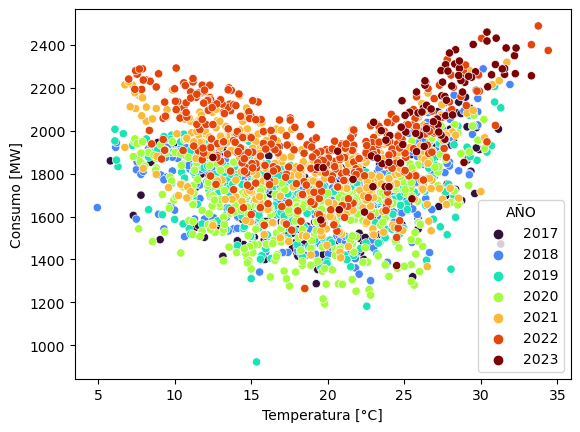

In [44]:
ax = sns.scatterplot(df, x='TEMPERATURA REFERENCIA MEDIA GBA °C', y='BUENOS AIRES', hue='AÑO', palette='turbo')
ax.set_ylabel('Consumo [MW]')
ax.set_xlabel('Temperatura [°C]')
plt.show()